In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('AirPassengers.csv') 
data.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [17]:
data = data.set_index('Month')
data.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


**Visualize the time series
check for seasonality trend or random patterns

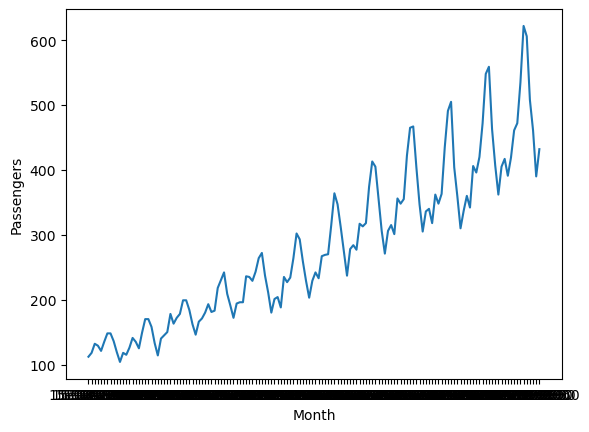

In [19]:
sns.lineplot(x=data.index,y=data['Passengers'])
plt.show()

In [ ]:
**Check for Stationarity
method-1 rolling statistics

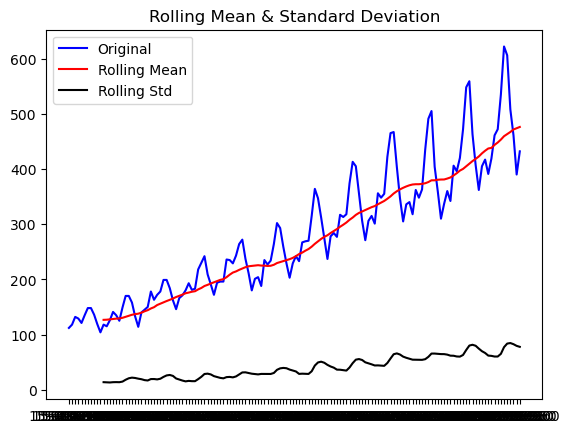

In [25]:
#Determing rolling statistics
rolmean = data[ 'Passengers'].rolling(window=12).mean ()
rolstd = data[ 'Passengers'].rolling(window=12).std()

#Plot rolling statistics:

orig = plt.plot(data['Passengers'], color='blue',label='Original')
mean = plt. plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.title('Rolling Mean & Standard Deviation') 
plt.legend( )
plt.show()

In [ ]:
**Method 2: Augmented Dicky Fuller Test
• for the ADF Test
• H0: data is non-stationary
• H1: data is stationary
• Based on palue, we will accept or reject HO (if p-value < 5% reject null hypothesis)

In [30]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(data['Passengers'])
adfuller_result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [31]:
print('p-value:',adfuller_result)

p-value: (0.8153688792060597, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [32]:
print('p-value:',adfuller_result[1])

p-value: 0.9918802434376411


In [ ]:
**The time series is not stationary

In [ ]:
**Now we have to convert non-stationary  data to stationary data

In [ ]:
**Differencing

In [34]:
diff = data['Passengers']-data['Passengers'].shift(2)

diff.dropna(inplace=True)

# Applying ADF Test
adfuller_result = adfuller(diff)
print('p-value of adf test:' ,adfuller_result[1])

p-value of adf test: 0.038629757676988535


In [ ]:
**Now the Time series is Stationary

In [ ]:
**Step-4: Plot ACF/PAC and find p,d,q parameters

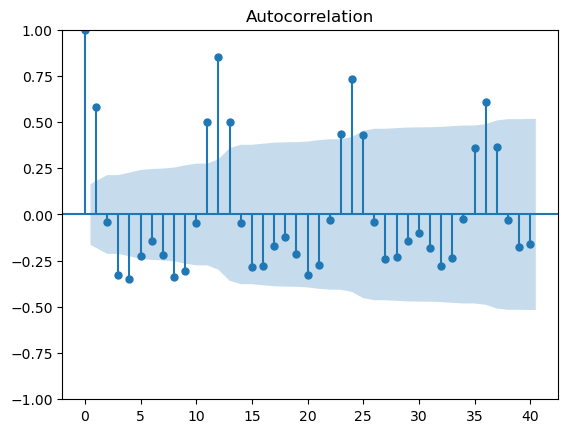

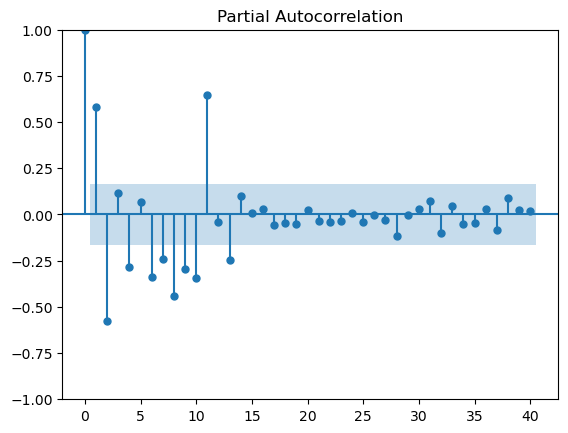

In [35]:
from statsmodels.tsa.stattools import acf,pacf 
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(diff,lags=40)
fig = sm.graphics.tsa.plot_pacf(diff,lags=40)


**From ACF curve, optimal value of q in the ARIMA model must be 1
From PACF curve, optimal value of p in the ARIMA model is 1

**Train-test Split
Split the data into train (80%) & test(20%)
• for time series data, we have use first 80% of records for training & next 20% of records for testing
• here 80% = 0.8 142 = 114 records, so first 114 records we have to use for tralning
Note: We should not apply train-test split function, because it divides the data randomly

In [37]:
y_train = diff[:114]
y_test = diff[114:]

**Build ARIMA Model
ARIMA Model is build by using p,d, q values
• p is AR value (determined from PACF plot)
• d is intergration
• q is MA value (determined from ACF plot)

**Modelling

In [39]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff,order=(1,2,1))
ARIMA = model. fit()

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Predections

In [41]:
ypred_test = ARIMA. predict(start=y_test.index[0],end=y_test.index[-1])
ypred_train = ARIMA.predict(start=y_train.index[0], end=y_train.index[-1])


In [ ]:
**Evaluation

In [46]:
from sklearn.metrics import r2_score
print("Train R2", r2_score(ypred_train,y_train))
print("Test R2", r2_score(ypred_test,y_test))

Train R2 0.34022485430256666
Test R2 0.4239665875806876


In [ ]:
**•Here, ARMA model is not performing Well because there is seasonality in the given data

In [ ]:
**Build SARIMAX Model

Whenever, there is seasonality in given data, apply SARIMAX SARIMAX Model is build by using p,d,q,s values
-p is AR value (determined from PACF plot)
-d is interaration
-q is MA value (determined from ACF
-s seasonality value


In [ ]:
**Modelling

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(diff, seasonal_order=(1,2,1,12))
SARIMAX = model.fit()

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
**Predection

In [48]:
ypred_train = SARIMAX.predict(start=y_train.index[0],end=y_train.index[-1])
ypred_test  = SARIMAX.predict(start=y_test.index[0],end=y_test.index[-1])

In [ ]:
**Evaluation

In [52]:
from sklearn.metrics import r2_score

print('Train R2 of SARIMAX model:',r2_score(ypred_train, y_train))
print('Test R2 of SARIMAX model:',r2_score(ypred_test, y_test))

Train R2 of SARIMAX model: 0.9053243980120667
Test R2 of SARIMAX model: 0.9540341095081739
